# Import modules

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k
from PIL import Image

# Load data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Function: reshape image

In [17]:
def reshape(x):
    """Reshape images to 14*14"""
    img = np.array(Image.fromarray(x.reshape(28, 28)).resize((14, 14)))
    #img = imresize(x.reshape(28,28), (14, 14))
    return img

# Create low resolution images

In [22]:
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])

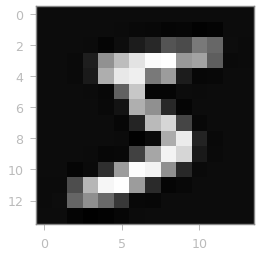

In [21]:
plt.gray()
plt.imshow(XX_train[0])

XX_train and XX_test will be the images that we will feed into the encoder, and X_train and X_test will be the targets.

# Scale the input images

In [23]:
# scale images to range between 0 and 1

# 14*14 train images
XX_train = XX_train/255

# 28*28 train label images
X_train = X_train/255
   
# 14*14 test images
XX_test = XX_test/255
   
# 28*28 test label images
X_test = X_test/255

# Define the AutoEncoder

The convolution autoencoder we are going to build will accept 14*14*1 images as input with 28*28*1 images as the targets, and will have the following characteristics:

In the encoder:
* The first layer is a convolution 2-D layer with 64 filters of size 3\*3, followed by batch normalization, with activation as `relu`, followed by downsampling with MaxPooling2D of size 2\*2
* The second layer, or the final layer in this encoder part, is again a convolution 2-D layer with 128 filters of size 3\*3, batch normalization, with activation as `relu`

In the decoder:
* The first layer is a convolution 2-D layer with 128 filters of size 3\*3 with activation as `relu`, followed by upsampling that's performed with UpSampling2D
* The second layer is a convolution 2-D layer with 64 filters of size 3\*3 with activation as `relu`, followed by upsampling with UpSampling2D
* The third layer, or the final layer in this decoder part, is again a convolution 2-D layer with 1 filter of size 3\*3 with activation as `sigmoid`


## Hyperparameters

In [24]:
batch_size = 128
epochs = 40
input_shape = (14,14,1)

## Function: make autoencoder

In [25]:
# define autoencoder
def make_autoencoder(input_shape):

    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return generator


## Compile the model

In [26]:
autoencoder = make_autoencoder(input_shape)

# compile auto encoder
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

# auto encoder summary
autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)      

## Fit the model

In [27]:
# fit autoencoder
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1),
                                    X_train.reshape(-1,28,28,1),
                                    batch_size=batch_size,
                                    epochs=epochs, verbose=1,
                                    validation_split = 0.2)

2022-07-20 16:54:56.399390: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-20 16:54:56.422032: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3699850000 Hz
2022-07-20 16:54:56.422422: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x555de9a3fcf0 executing computations on platform Host. Devices:
2022-07-20 16:54:56.422447: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-07-20 16:54:56.458767: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not 

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0267 - val_loss: 0.0093
Epoch 2/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 3/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 4/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/40
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/40
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/40
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch

## Plot the model

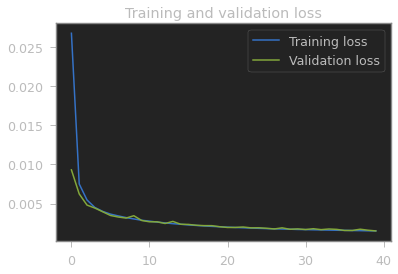

Input


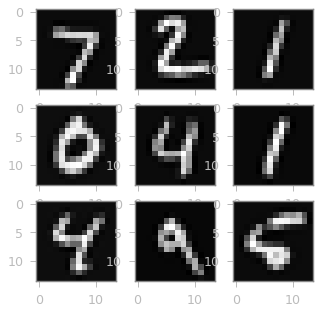

In [28]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss')
plt.plot(epochs_, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()    
plt.show()

## Plot reconstructed data

Input


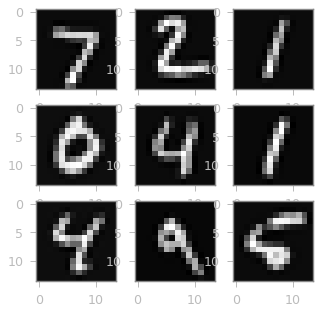

GENERATED


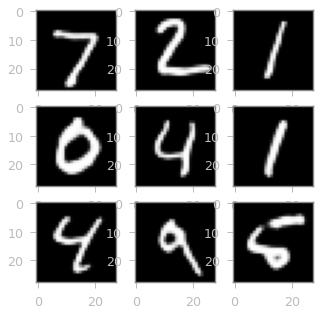

In [29]:
print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1],verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()